# Doc2Vec Plagiarism

In [1]:
import gensim
import os
import collections
import random

In [2]:
train_file = '/storage/plagiarism_data_train.txt'
test_file = '/storage/plagiarism_data_test.txt'

## Define a Function to Read and Preprocess Text

In [3]:
def read_corpus(fname):
    with open(fname, encoding="utf-8") as f:
        for line in f:
            words = line.split(" ")
            yield gensim.models.doc2vec.TaggedDocument(words[2:], [words[0]])

In [4]:
train_corpus = list(read_corpus(train_file))
test_corpus = list(read_corpus(test_file))

Let's take a look at the training corpus

In [27]:
len(train_corpus)

189

In [6]:
len(test_corpus)

62

In [7]:
train_corpus[:2]

[TaggedDocument(words=['package', 'test', ';', 'import', 'java', '.', 'io', '.', 'PrintStream', ';', 'import', 'ru', '.', 'ipccenter', '.', '*', ';', 'public', 'class', 'Array3dImpl', 'extends', 'StudentTask', 'implements', 'Array3d', '<', 'StringBuffer', '>', '{', 'private', 'StringBuffer', '[', ']', '[', ']', '[', ']', 'a', ';', 'Array3dImpl', '(', ')', '{', 'a', '=', 'new', 'StringBuffer', '[', '10', ']', '[', ']', '[', ']', ';', 'for', '(', 'int', 'i', '=', '0', ';', 'i', '<', '10', ';', 'i', '++', ')', 'a', '[', 'i', ']', '=', 'new', 'StringBuffer', '[', 'i', '+', '1', ']', '[', ']', ';', 'for', '(', 'int', 'i', '=', '0', ';', 'i', '<', '10', ';', 'i', '++', ')', 'for', '(', 'int', 'j', '=', '0', ';', 'j', '<=', 'i', ';', 'j', '++', ')', 'a', '[', 'i', ']', '[', 'j', ']', '=', 'new', 'StringBuffer', '[', '(', 'i', '+', '1', ')', '*', '(', 'j', '+', '1', ')', ']', ';', 'for', '(', 'int', 'i', '=', '0', ';', 'i', '<', '10', ';', 'i', '++', ')', 'for', '(', 'int', 'j', '=', '0', ';',

And the testing corpus looks like this:

In [8]:
print(test_corpus[:2])

[TaggedDocument(words=['package', 'test', ';', 'import', 'java', '.', 'io', '.', '*', ';', 'import', 'test', '.', 'StudentTask', ';', 'import', 'test', '.', 'Array3d', ';', 'public', 'class', 'Array3dImpl', 'extends', 'StudentTask', 'implements', 'Array3d', '<', 'Object', '>', '{', 'private', 'StringBuffer', 'myArr', '[', ']', '[', ']', '[', ']', ';', 'Array3dImpl', '(', ')', '{', 'this', '.', 'myArr', '=', 'new', 'StringBuffer', '[', '10', ']', '[', ']', '[', ']', ';', 'for', '(', 'int', 'i', '=', '0', ';', 'i', '<', '10', ';', 'i', '++', ')', '{', 'this', '.', 'myArr', '[', 'i', ']', '=', 'new', 'StringBuffer', '[', 'i', '+', '1', ']', '[', ']', ';', '}', 'for', '(', 'int', 'i', '=', '0', ';', 'i', '<', '10', ';', 'i', '++', ')', '{', 'for', '(', 'int', 'j', '=', '0', ';', 'j', '<=', '(', 'i', ')', ';', 'j', '++', ')', '{', 'int', 'a', '=', '(', 'i', '+', '1', ')', '*', '(', 'j', '+', '1', ')', ';', 'this', '.', 'myArr', '[', 'i', ']', '[', 'j', ']', '=', 'new', 'StringBuffer', '[', 

Notice that the testing corpus is just a list of lists and does not contain any tags.

## Training the Model

### Instantiate a Doc2Vec Object 

Now, we'll instantiate a Doc2Vec model with a vector size with 50 words and iterating over the training corpus 10 times. We set the minimum word count to 2 in order to give higher frequency words more weighting. Model accuracy can be improved by increasing the number of iterations but this generally increases the training time.

In [9]:
model = gensim.models.doc2vec.Doc2Vec(size=50, min_count=2, iter=10)

### Build a Vocabulary

In [10]:
model.build_vocab(train_corpus)

Essentially, the vocabulary is a dictionary (accessible via `model.vocab`) of all of the unique words extracted from the training corpus along with the count (e.g., `model.vocab['penalty'].count` for counts for the word `penalty`).

### Time to Train

This should take no more than 2 minutes

In [11]:
%time model.train(train_corpus)

CPU times: user 2.15 s, sys: 30 ms, total: 2.18 s
Wall time: 2.17 s


1186390

### Inferring a Vector

One important thing to note is that you can now infer a vector for any piece of text without having to re-train the model by passing a list of words to the `model.infer_vector` function. This vector can then be compared with other vectors via cosine similarity.

In [12]:
model.infer_vector(['int', 'a', '=', 'b', '+', 'c'])

array([-0.02931047,  0.07217811,  0.02000291, -0.04379213, -0.04497137,
        0.01334973, -0.08149602,  0.0312    ,  0.00481364, -0.02433915,
       -0.00437792,  0.00726462,  0.06565358,  0.01211023, -0.13947631,
       -0.00343085,  0.06316233, -0.04310633, -0.05438584,  0.14695515,
       -0.0026046 , -0.01131392, -0.02700348,  0.01260179,  0.02967028,
        0.02833434, -0.04882667, -0.0597178 ,  0.0514775 , -0.02992477,
        0.04361853,  0.06882864,  0.04153823,  0.06923718, -0.0011588 ,
        0.04979204, -0.02935824,  0.03984696,  0.04022535, -0.01912251,
       -0.02667601, -0.04535805, -0.09140994, -0.02577547,  0.00179301,
        0.01699364, -0.0116891 , -0.02914162,  0.21789895, -0.04192097], dtype=float32)

## Assessing Model

To assess our new model, we'll first infer new vectors for each document of the training corpus, compare the inferred vectors with the training corpus, and then returning the rank of the document based on self-similarity. Basically, we're pretending as if the training corpus is some new unseen data and then seeing how they compare with the trained model. The expectation is that we've likely overfit our model (i.e., all of the ranks will be less than 2) and so we should be able to find similar documents very easily. Additionally, we'll keep track of the second ranks for a comparison of less similar documents.

In [13]:
ranks = []
second_ranks = []
for doc_id in range(len(train_corpus)):
    doc = train_corpus[doc_id]
    inferred_vector = model.infer_vector(doc.words)
    sims = model.docvecs.most_similar([inferred_vector], topn=len(model.docvecs))
    rank = [docid for docid, sim in sims].index(doc.tags[0])
    ranks.append(rank)
    
    second_ranks.append(sims[1])

Let's count how each document ranks with respect to the training corpus 

In [14]:
collections.Counter(ranks)  #96% accuracy

Counter({0: 163, 1: 18, 2: 2, 5: 1, 21: 1, 24: 1, 30: 1, 44: 1, 60: 1})

Basically, greater than 95% of the inferred documents are found to be most similar to itself and about 5% of the time it is mistakenly most similar to another document. This is great and not entirely surprising. We can take a look at an example:

In [15]:
print('Document {}\n'.format(train_corpus[doc_id].tags))
print(u'SIMILAR/DISSIMILAR DOCS PER MODEL %s:\n' % model)
for label, index in [('MOST', 0), ('MEDIAN', len(sims)//2), ('LEAST', len(sims) - 1)]:
    print(u'%s %s\n' % (label, sims[index]))

Document ['train-Zemlianoj-util2']

SIMILAR/DISSIMILAR DOCS PER MODEL Doc2Vec(dm/s,d50,hs,w8,mc2):

MOST ('train-Zemlianoj-util2', 0.8520732522010803)

MEDIAN ('train-Lykov-xml1', 0.026329761371016502)

LEAST ('train-karpunina-reflection0', -0.29811471700668335)



Notice above that the most similar document is has a similarity score of ~80% (or higher). However, the similarity score for the second ranked documents should be significantly lower (assuming the documents are in fact different) and the reasoning becomes obvious when we examine the text itself

## Testing the Model

Using the same approach above, we'll infer the vector for a randomly chosen test document, and compare the document to our model by eye.

In [17]:
# Pick a random document from the test corpus and infer a vector from the model
doc_id = random.randint(0, len(test_corpus))
test_doc = test_corpus[doc_id]
inferred_vector = model.infer_vector(test_doc.words)
sims = model.docvecs.most_similar([inferred_vector], topn=3)

# Compare and print the most/median/least similar documents from the train corpus
print('Test Document {}\n'.format(test_doc.tags))
print(u'SIMILAR/DISSIMILAR DOCS PER MODEL %s:\n' % model)
for label, index in [('1st', 0), ('2nd', 1), ('3rd', 2)]:
    print(u'%s %s\n' % (label, sims[index]))

Test Document ['test-dolgavin-xml1']

SIMILAR/DISSIMILAR DOCS PER MODEL Doc2Vec(dm/s,d50,hs,w8,mc2):

1st ('train-Ivanov_R-xml1', 0.7877169847488403)

2nd ('train-dubov-xml1', 0.6540816426277161)

3rd ('train-morgen-xml1', 0.6065918803215027)



In [18]:
#next(x for x in test_corpus if (x.tags[0] == '/Users/dmitry/Development/rnn/doc2vec/plagiarism_data/test/shilyaev/ru/ipccenter/deadline1/util1/CheckerImpl.java'))

StopIteration: 

In [ ]:
#next(x for x in train_corpus if (x.tags[0] == '/Users/dmitry/Development/rnn/doc2vec/plagiarism_data/train/shaykhlislamov/ru/ipccenter/deadline1/util1/CheckerImpl.java'))

In [34]:
train_tags = [doc.tags[0] for doc in train_corpus]
train_vectors = [model.docvecs[tag] for tag in tags]

In [35]:
test_tags = [doc.tags[0] for doc in test_corpus]
test_vectors = [model.infer_vector(doc.words) for doc in test_corpus]

In [57]:
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt

def plot_with_labels(low_dim_embs, labels, figsize=(75, 75)):
  plt.figure(figsize=figsize)  #in inches
  for i, label in enumerate(labels):
    x, y = low_dim_embs[i,:]
    plt.scatter(x, y)
    plt.annotate(label,
                 xy=(x, y),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')

In [55]:
tsne = TSNE(perplexity=5, n_components=2, init='pca', n_iter=5000)
tsne_train_vectors = tsne.fit_transform(train_vectors)

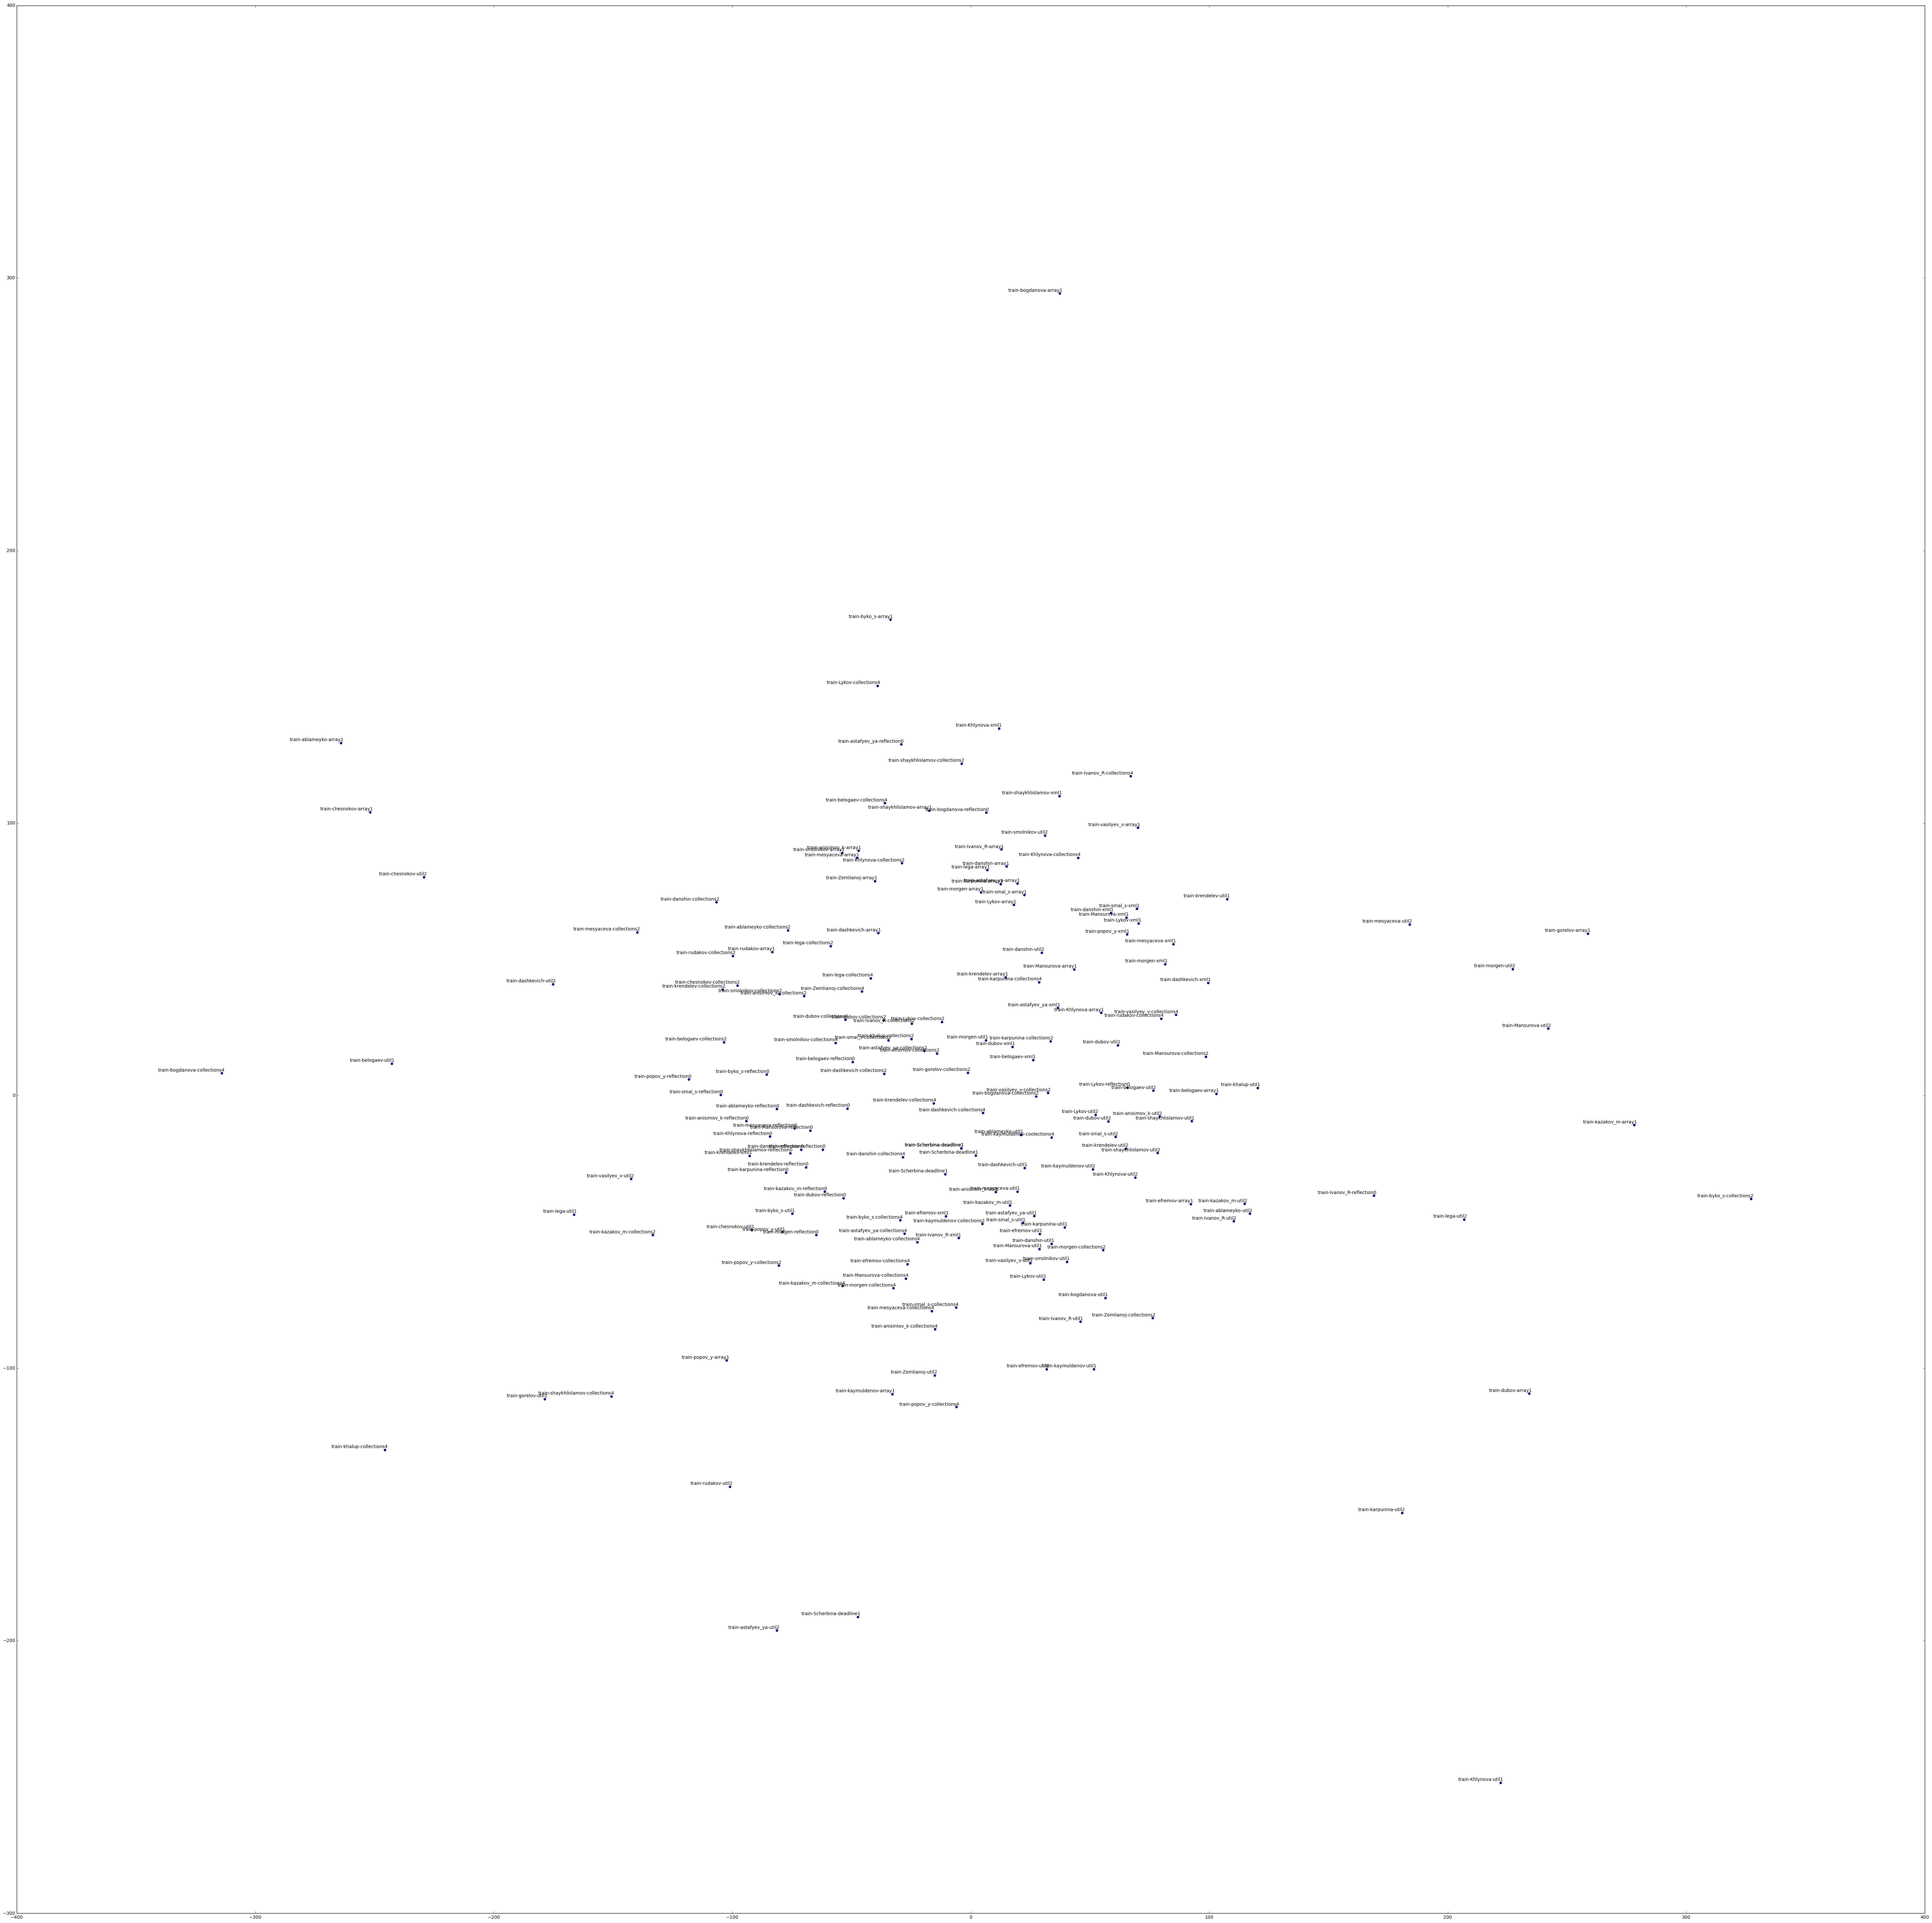

In [58]:
plot_with_labels(tsne_train_vectors, train_tags)

In [52]:
tsne = TSNE(perplexity=5, n_components=2, init='pca', n_iter=5000)
tsne_test_vectors = tsne.fit_transform(test_vectors)

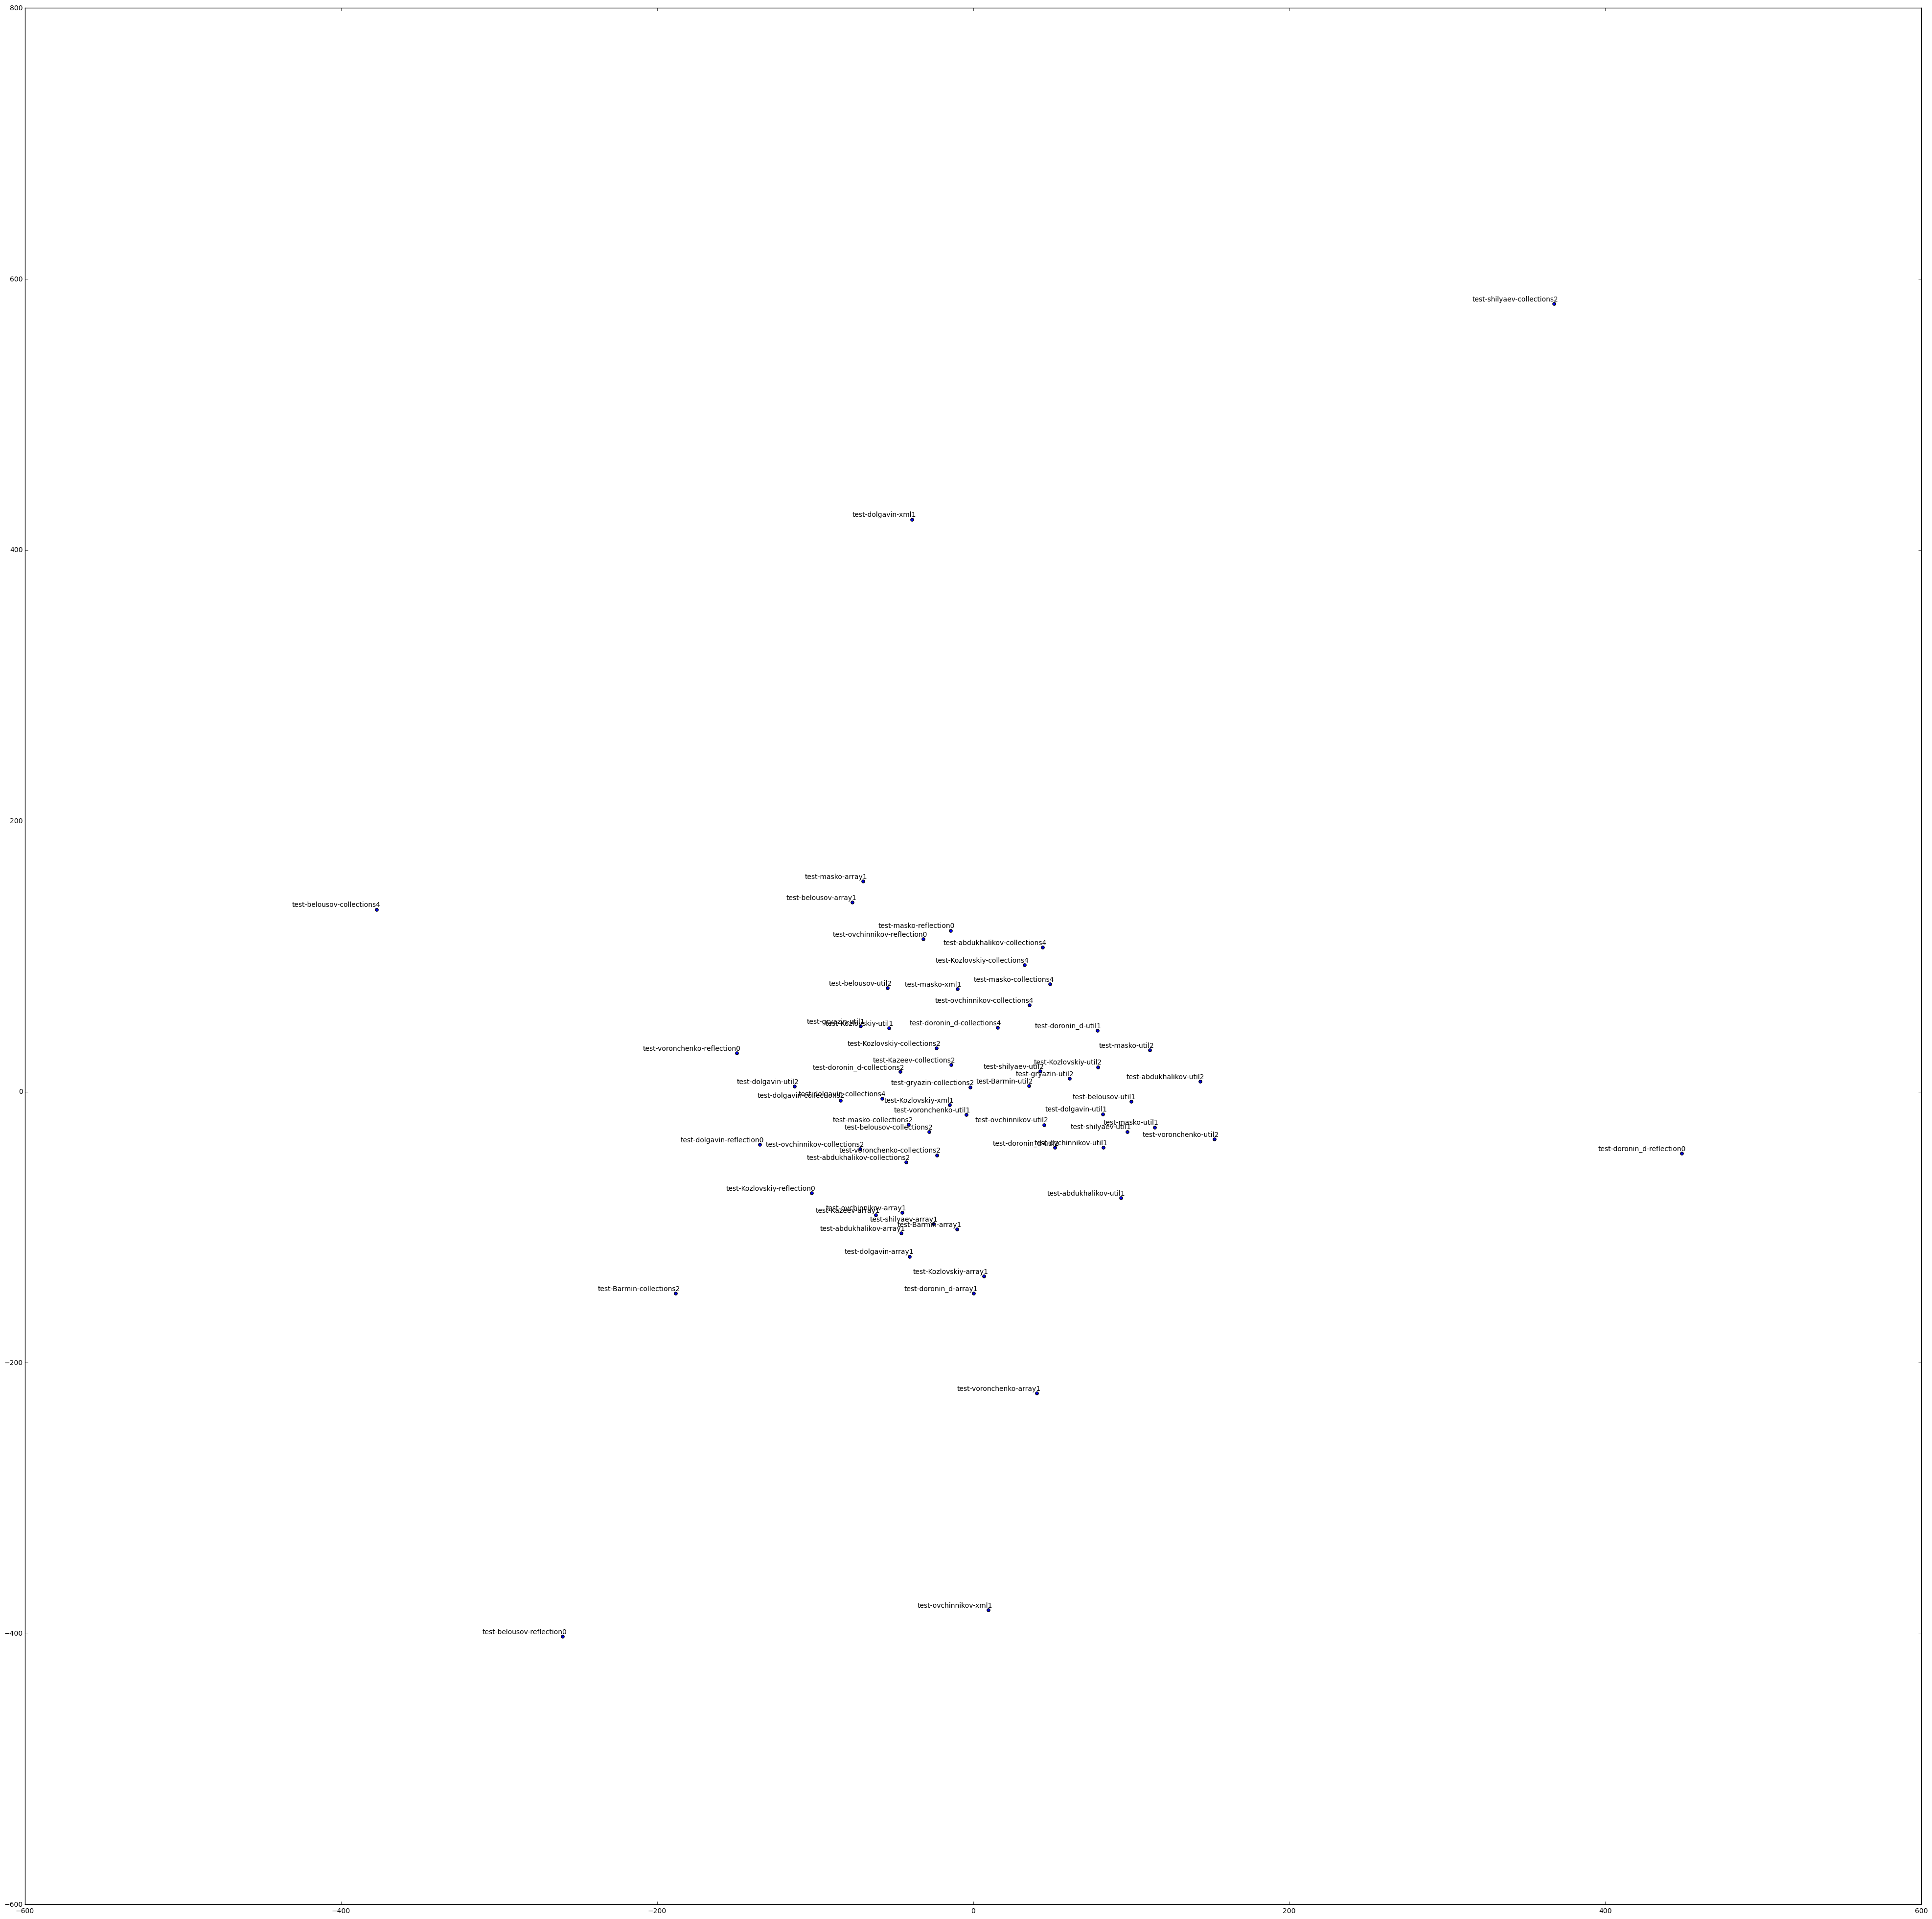

In [54]:
plot_with_labels(tsne_test_vectors, test_tags, figsize=(50, 50))

In [59]:
tsne = TSNE(perplexity=5, n_components=2, init='pca', n_iter=5000)
tsne_all_vectors = tsne.fit_transform(train_vectors + test_vectors)

In [ ]:
plot_with_labels(tsne_all_vectors, train_tags + test_tags)

### Wrapping Up

That's it! Doc2Vec is a great way to explore relationships between documents.